This file takes the merged dataframe of ACS Data and NPI information for EDA


In [1]:
### Install if needed
# !pip install pgeocode
# !pip install censusgeocode

### Import Libraries 
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import pgeocode as pg       #might not need here
import censusgeocode as cg  #might not need here

In [2]:
### Import mergedTable
mergedTable = pd.read_pickle('mergedTable.pkl')
mergedTable

GEO_ID  Provider Count householdIncomeBins hsDegreeBins  \
0     1400000US08001007801             0.0            Very Low     Very Low   
1     1400000US08001007802             0.0            Very Low     Very Low   
2     1400000US08001007900             0.0                 Low     Very Low   
3     1400000US08001008000             0.0                 Low     Very Low   
4     1400000US08001008100             0.0            Very Low    Very High   
...                    ...             ...                 ...          ...   
1442  1400000US08123002300             0.0              Medium     Very Low   
1443  1400000US08123002501             0.0                 Low       Medium   
1444  1400000US08123002502             0.0              Medium     Very Low   
1445  1400000US08125963100             0.0                 Low     Very Low   
1446  1400000US08125963200             0.0            Very Low     Very Low   

     marriedBins cohabitingBins maleHouseholderBins femaleHouseholderBins  \
0       Very Low      Very High           Very High             Very High   
1       Very Low      Very High           Very High                Medium   
2       Very Low      Very High                High                Medium   
3            Low         Medium                High             Very High   
4       Very Low      Very High           Very High             Very High   
...          ...            ...                 ...                   ...   
1442        High       Very Low              Medium                   Low   
1443        High            Low            Very Low                Medium   
1444        High            Low                 Low                   Low   
1445        High            Low                 Low                  High   
1446      Medium      Very High                 Low                   Low   

     neverMarriedBins nowMarriedBins separatedBins widowedBins divorcedBins  \
0           Very High       Very Low     Very High        High         High   
1           Very High       Very Low      Very Low         Low         High   
2           Very High       Very Low     Very High      Medium         High   
3                High            Low     Very High      Medium       Medium   
4           Very High       Very Low           Low        High         High   
...               ...            ...           ...         ...          ...   
1442         Very Low           High        Medium        High       Medium   
1443              Low           High        Medium      Medium          Low   
1444              Low           High          High        High          Low   
1445              Low           High          High        High          Low   
1446         Very Low           High          High   Very High          Low   

     nativeBornBins foreignBornBins civilVetBins belowPovertyBins  \
0          Very Low       Very High     Very Low        Very High   
1          Very Low       Very High       Medium        Very High   
2          Very Low       Very High     Very Low        Very High   
3          Very Low       Very High         High             High   
4          Very Low       Very High         High        Very High   
...             ...             ...          ...              ...   
1442         Medium          Medium       Medium           Medium   
1443         Medium          Medium         High        Very High   
1444            Low            High         High             High   
1445            Low            High       Medium             High   
1446       Very Low       Very High     Very Low        Very High   

     atOrAbovePovertyBins 65andOverBins 75andOverBins  
0                Very Low      Very Low      Very Low  
1                Very Low      Very Low      Very Low  
2                Very Low      Very Low      Very Low  
3                     Low        Medium          High  
4                Very Low        Medium          High  
...                   ...       

In [3]:
### Import Census Tract Boundaries
tracts = gpd.read_file('Colorado_Census_Tract_Boundaries.geojson')
# tracts

In [4]:
### Add additional information to FIPS to match mergedTable and rename column
tracts['FIPS'] = '1400000US' + tracts['FIPS']
tracts = tracts.rename(columns={'FIPS': 'GEO_ID'})
# tracts 

In [5]:
### Add Census Boundaries to mergedTable
mergedTableBounds = pd.merge(tracts, mergedTable, on = 'GEO_ID', how = 'right')
mergedTableBounds.head(3) 

OBJECTID                GEO_ID  \
0       546  1400000US08001007801   
1      1335  1400000US08001007802   
2       779  1400000US08001007900   

                                            geometry  Provider Count  \
0  POLYGON ((-104.88466 39.74380, -104.88466 39.7...             0.0   
1  POLYGON ((-104.86581 39.74379, -104.86582 39.7...             0.0   
2  POLYGON ((-104.88467 39.74747, -104.88467 39.7...             0.0   

  householdIncomeBins hsDegreeBins marriedBins cohabitingBins  \
0            Very Low     Very Low    Very Low      Very High   
1            Very Low     Very Low    Very Low      Very High   
2                 Low     Very Low    Very Low      Very High   

  maleHouseholderBins femaleHouseholderBins  ... separatedBins widowedBins  \
0           Very High             Very High  ...     Very High        High   
1           Very High                Medium  ...      Very Low         Low   
2                High                Medium  ...     Very High      Medium   

  divorcedBins nativeBornBins foreignBornBins civilVetBins belowPovertyBins  \
0         High       Very Low       Very High     Very Low        Very High   
1         High       Very Low       Very High       Medium        Very High   
2         High       Very Low       Very High     Very Low        Very High   

  atOrAbovePovertyBins 65andOverBins 75andOverBins  
0             Very Low      Very Low      Very Low  
1             Very Low      Very Low      Very Low  
2             Very Low      Very Low      Very Low  

[3 rows x 22 columns]

Update columns for Correlation Mapping

In [6]:
corrDF = mergedTableBounds.copy()
corrDF = corrDF.drop(columns=['OBJECTID', 'GEO_ID', 'geometry'])

ordinalMap = {'Very Low': 1, 'Low': 2, 'Medium': 3, 'High': 4, 'Very High': 5}

binColumns = [col for col in corrDF.columns if col.endswith('Bins')]
for col in binColumns:
    corrDF[col] = corrDF[col].replace(ordinalMap).astype(float)

corrDF = corrDF.dropna()

Correlation Map

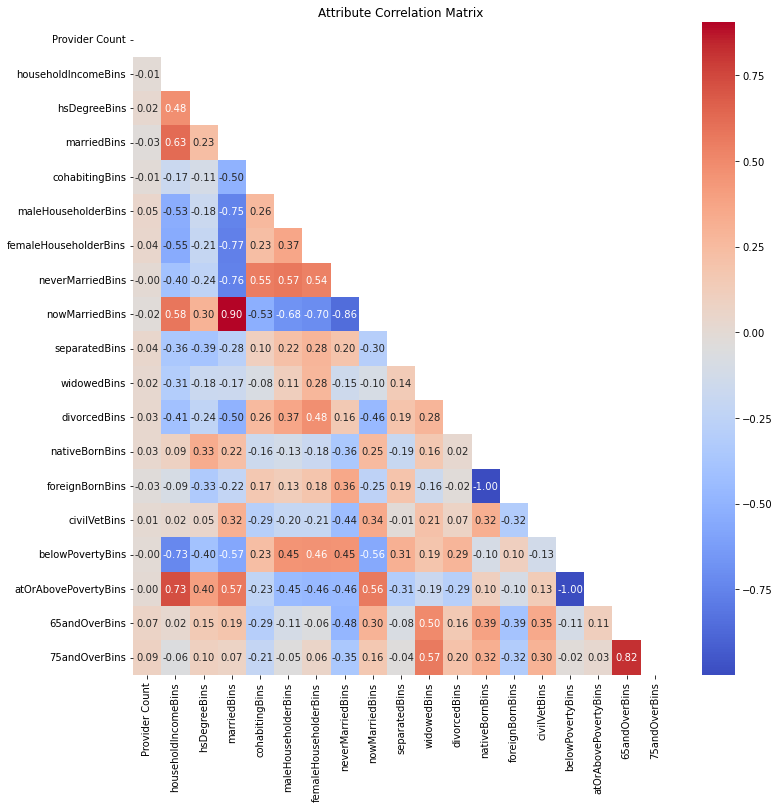

In [7]:
corrMatrix = corrDF.corr()
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
plt.figure(figsize=(12,12))
sns.heatmap(corrMatrix, mask = mask, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title('Attribute Correlation Matrix')
plt.show()

In [8]:
corrMatrix

Provider Count  householdIncomeBins  hsDegreeBins  \
Provider Count               1.000000            -0.009879      0.021629   
householdIncomeBins         -0.009879             1.000000      0.475069   
hsDegreeBins                 0.021629             0.475069      1.000000   
marriedBins                 -0.028998             0.628583      0.232181   
cohabitingBins              -0.013649            -0.174909     -0.109857   
maleHouseholderBins          0.047221            -0.532171     -0.176752   
femaleHouseholderBins        0.039871            -0.548105     -0.210045   
neverMarriedBins            -0.000007            -0.403122     -0.243118   
nowMarriedBins              -0.019252             0.579789      0.295909   
separatedBins                0.035758            -0.358813     -0.385187   
widowedBins                  0.022489            -0.313407     -0.178294   
divorcedBins                 0.032378            -0.406127     -0.240555   
nativeBornBins               0.031412             0.092510      0.332228   
foreignBornBins             -0.030799            -0.093685     -0.331404   
civilVetBins                 0.008133             0.020071      0.047357   
belowPovertyBins            -0.003459            -0.726108     -0.403043   
atOrAbovePovertyBins         0.004094             0.725648      0.403255   
65andOverBins                0.067790             0.019709      0.150831   
75andOverBins                0.088892            -0.055606      0.099964   

                       marriedBins  cohabitingBins  maleHouseholderBins  \
Provider Count           -0.028998       -0.013649             0.047221   
householdIncomeBins       0.628583       -0.174909            -0.532171   
hsDegreeBins              0.232181       -0.109857            -0.176752   
marriedBins               1.000000       -0.504939            -0.747498   
cohabitingBins           -0.504939        1.000000             0.261778   
maleHouseholderBins      -0.747498        0.261778             1.000000   
femaleHouseholderBins    -0.765688        0.233686             0.365198   
neverMarriedBins         -0.756813        0.551222             0.570552   
nowMarriedBins            0.903855       -0.529654            -0.679332   
separatedBins            -0.277267        0.104973             0.218459   
widowedBins              -0.170817       -0.082513             0.114124   
divorcedBins             -0.504942        0.256078             0.366773   
nativeBornBins            0.222943       -0.164979            -0.127864   
foreignBornBins          -0.224495        0.166337             0.129286   
civilVetBins              0.315881       -0.292225            -0.204081   
belowPovertyBins         -0.568214        0.233328             0.454395   
atOrAbovePovertyBins      0.569867       -0.234910            -0.454746   
65andOverBins             0.185336       -0.293860            -0.113748   
75andOverBins             0.073283       -0.212367            -0.046114   

                       femaleHouseholderBins  neverMarriedBins  \
Provider Count                      0.039871         -0.000007   
householdIncomeBins                -0.548105         -0.403122   
hsDegreeBins                       -0.210045         -0.243118   
marriedBins                        -0.765688         -0.756813   
cohabitingBins                      0.233686          0.551222   
maleHouseholderBins                 0.365198          0.570552   
femaleHouseholderBins               1.000000          0.535833   
neverMarriedBins                    0.535833          1.000000   
nowMarriedBins                     -0.701854         -0.855019   
separatedBins                       0.284305          0.196955   
widowedBins                         0.278949         -0.153008   
divorcedBins                        0.475465          0.158832   
nativeBornBins                     -0.183628         -0.355241   
foreignBornBins                     0.184571          0.357146   
civilVetBin

In [9]:
### I don't want to see correlations between items from the same table
excludedGroups = [
    {'marriedBins', 'cohabitingBins', 'maleHouseholderBins', 'femaleHouseholderBins', 'neverMarriedBins', 'nowMarriedBins',	'separatedBins', 'widowedBins', 'divorcedBins'},
	{'nativeBornBins', 'foreignBornBins'},
	{'belowPovertyBins', 'atOrAbovePovertyBins'},
	{'65andOverBins', '75andOverBins'}
]

def excludedPairs(col1, col2):
    for group in excludedGroups:
        if col1 in group and col2 in group:
            return True
    return False


In [10]:
### Build correlation DF
corrPairs = corrMatrix.unstack().reset_index()
corrPairs.columns = ['Var 1', 'Var 2', 'Correlation']
corrPairs = corrPairs[corrPairs['Var 1'] != corrPairs['Var 2']]

## Avoid duplicates like (A,B) and (B,A) 
corrPairs['Pair'] = corrPairs.apply(lambda row: tuple(sorted([row['Var 1'], row['Var 2']])), axis=1)
corrPairs = corrPairs.drop_duplicates('Pair')

## Fliter out excluded pairs
corrPairs = corrPairs[~corrPairs['Pair'].apply(lambda x: excludedPairs(*x))]

## Calculate abs and sort
corrPairs['AbsCorr'] = corrPairs['Correlation'].abs()
sortedCorrPairs = corrPairs.sort_values(by = 'AbsCorr', ascending=False).round(2)

sortedCorrPairs.head(75)

Var 1                 Var 2  Correlation  \
34     householdIncomeBins      belowPovertyBins        -0.73   
35     householdIncomeBins  atOrAbovePovertyBins         0.73   
22     householdIncomeBins           marriedBins         0.63   
27     householdIncomeBins        nowMarriedBins         0.58   
73             marriedBins  atOrAbovePovertyBins         0.57   
..                     ...                   ...          ...   
74             marriedBins         65andOverBins         0.19   
127  femaleHouseholderBins       foreignBornBins         0.18   
126  femaleHouseholderBins        nativeBornBins        -0.18   
48            hsDegreeBins           widowedBins        -0.18   
43            hsDegreeBins   maleHouseholderBins        -0.18   

                                            Pair  AbsCorr  
34       (belowPovertyBins, householdIncomeBins)     0.73  
35   (atOrAbovePovertyBins, householdIncomeBins)     0.73  
22            (householdIncomeBins, marriedBins)     0.63  
27         (householdIncomeBins, nowMarriedBins)     0.58  
73           (atOrAbovePovertyBins, marriedBins)     0.57  
..                                           ...      ...  
74                  (65andOverBins, marriedBins)     0.19  
127     (femaleHouseholderBins, foreignBornBins)     0.18  
126      (femaleHouseholderBins, nativeBornBins)     0.18  
48                   (hsDegreeBins, widowedBins)     0.18  
43           (hsDegreeBins, maleHouseholderBins)     0.18  

[75 rows x 5 columns]

Mapping

In [18]:
mergedTableBounds.describe()

OBJECTID  Provider Count
count  1447.000000     1447.000000
mean    724.000000        0.186593
std     417.857232        1.047826
min       1.000000        0.000000
25%     362.500000        0.000000
50%     724.000000        0.000000
75%    1085.500000        0.000000
max    1447.000000       23.000000

In [19]:
conditions = [
    (mergedTableBounds['Provider Count'] >= 1) & (mergedTableBounds['Provider Count'] <= 5),
    (mergedTableBounds['Provider Count'] >= 6) & (mergedTableBounds['Provider Count'] <= 10),
    (mergedTableBounds['Provider Count'] >= 11) & (mergedTableBounds['Provider Count'] <= 15),
    (mergedTableBounds['Provider Count'] >= 16) & (mergedTableBounds['Provider Count'] <= 20),
    (mergedTableBounds['Provider Count'] >= 21)
]

values = ['1-5', '6-10','11-15','16-20','21+']

mergedTableBounds['Provider Count Bin'] = np.select(conditions, values)

mergedTableBounds.head()

OBJECTID                GEO_ID  \
0       546  1400000US08001007801   
1      1335  1400000US08001007802   
2       779  1400000US08001007900   
3      1423  1400000US08001008000   
4      1424  1400000US08001008100   

                                            geometry  Provider Count  \
0  POLYGON ((-104.88466 39.74380, -104.88466 39.7...             0.0   
1  POLYGON ((-104.86581 39.74379, -104.86582 39.7...             0.0   
2  POLYGON ((-104.88467 39.74747, -104.88467 39.7...             0.0   
3  POLYGON ((-104.86595 39.75475, -104.86593 39.7...             0.0   
4  POLYGON ((-104.84708 39.74134, -104.84710 39.7...             0.0   

  householdIncomeBins hsDegreeBins marriedBins cohabitingBins  \
0            Very Low     Very Low    Very Low      Very High   
1            Very Low     Very Low    Very Low      Very High   
2                 Low     Very Low    Very Low      Very High   
3                 Low     Very Low         Low         Medium   
4            Very Low    Very High    Very Low      Very High   

  maleHouseholderBins femaleHouseholderBins  ... widowedBins divorcedBins  \
0           Very High             Very High  ...        High         High   
1           Very High                Medium  ...         Low         High   
2                High                Medium  ...      Medium         High   
3                High             Very High  ...      Medium       Medium   
4           Very High             Very High  ...        High         High   

  nativeBornBins foreignBornBins civilVetBins belowPovertyBins  \
0       Very Low       Very High     Very Low        Very High   
1       Very Low       Very High       Medium        Very High   
2       Very Low       Very High     Very Low        Very High   
3       Very Low       Very High         High             High   
4       Very Low       Very High         High        Very High   

  atOrAbovePovertyBins 65andOverBins 75andOverBins Provider Count Bin  
0             Very Low      Very Low      Very Low                  0  
1             Very Low      Very Low      Very Low                  0  
2             Very Low      Very Low      Very Low                  0  
3                  Low        Medium          High                  0  
4             Very Low        Medium          High                  0  

[5 rows x 23 columns]

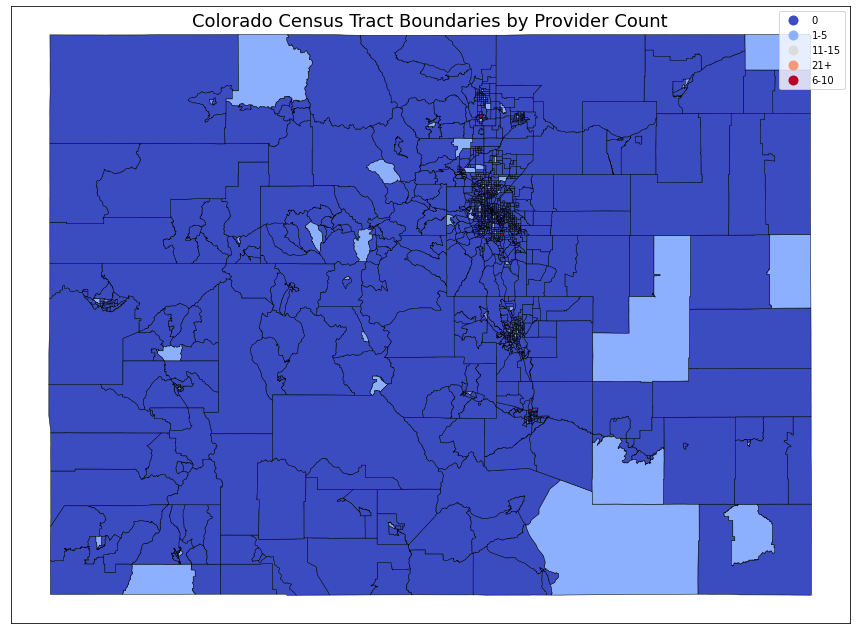

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
mergedTableBounds.plot(
    column = 'Provider Count Bin', 
    ax = ax, 
    cmap='coolwarm', 
    edgecolor='black', 
    linewidth=0.5,
    legend = True,
    categorical = True,
    )

ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
   
xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax.text(
    x=(xlim[0] + xlim[1]) / 2,
    y=ylim[1] * 0.999,
    s=f"Colorado Census Tract Boundaries by Provider Count",
    fontsize=18,
    ha='center',
    va='top',
    backgroundcolor='white',
    bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, boxstyle='square, pad=0.2')
)

plt.tight_layout()
plt.show()

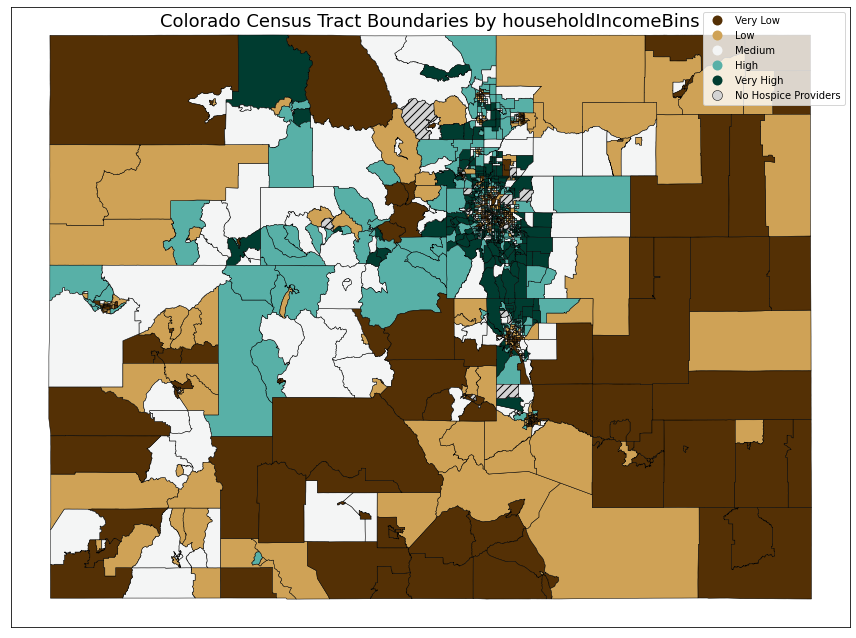

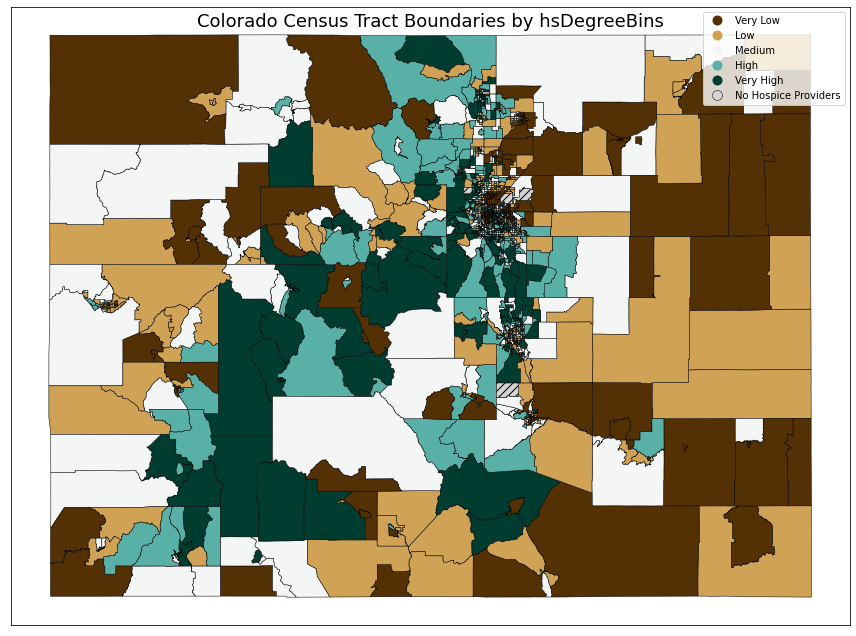

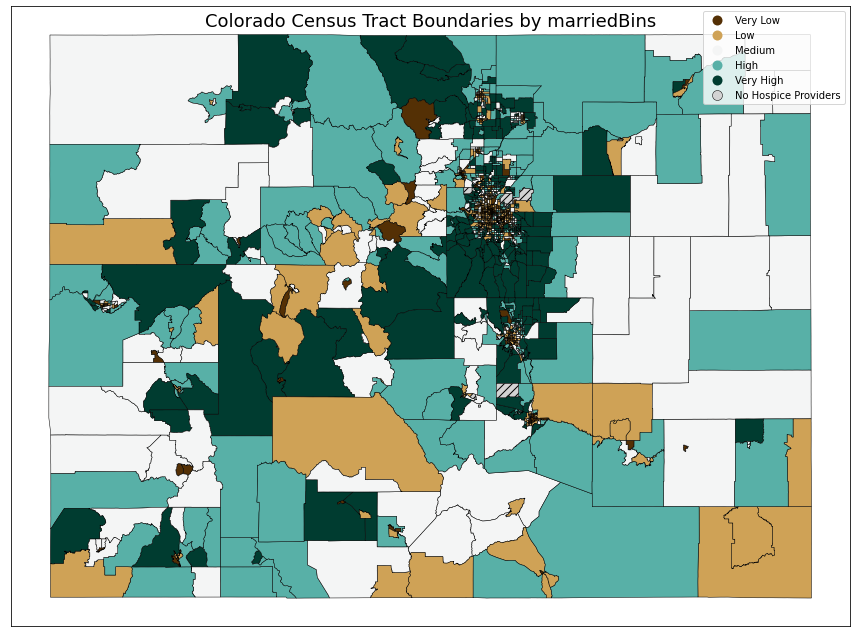

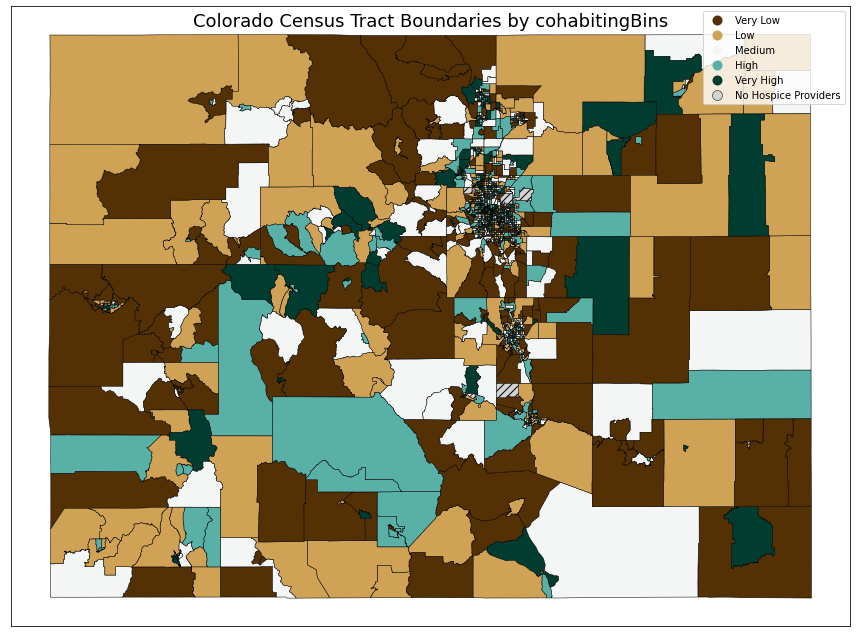

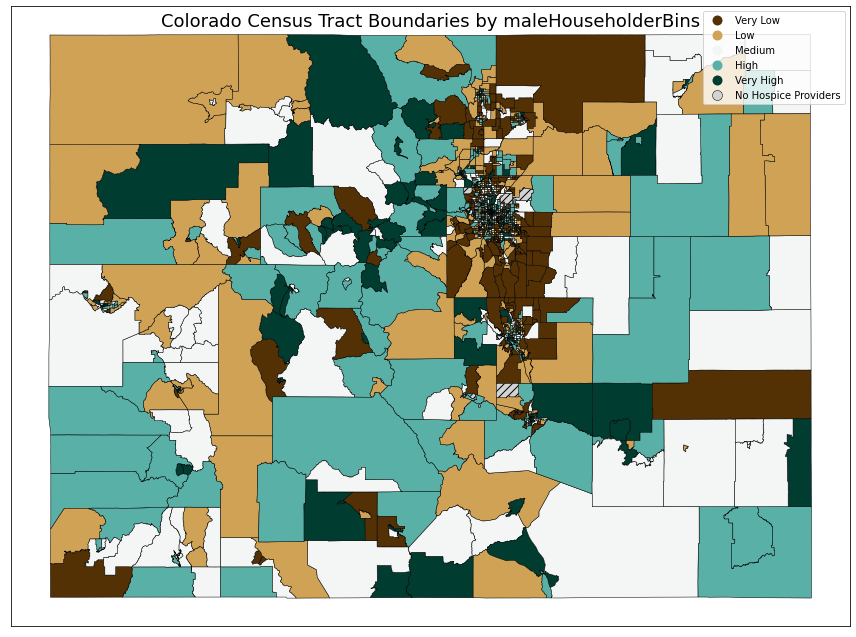

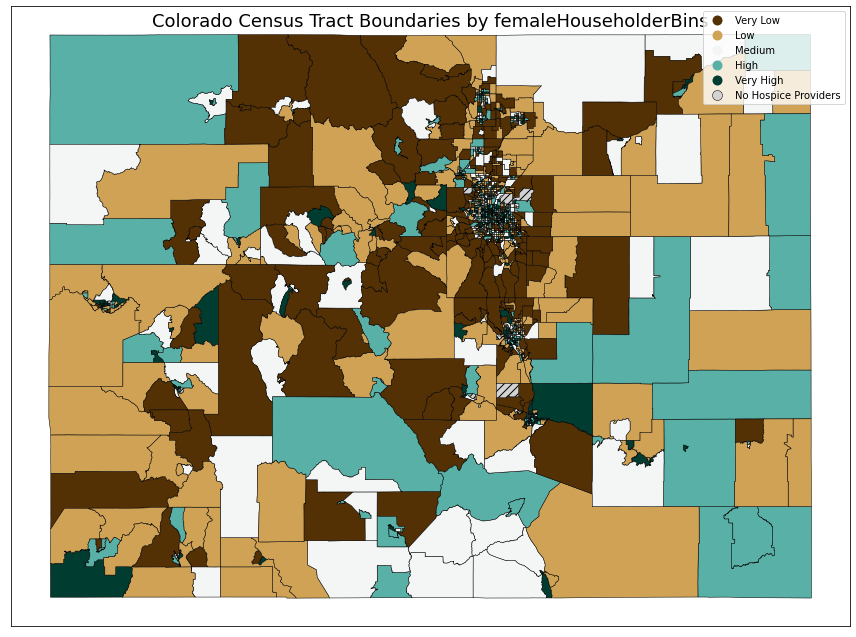

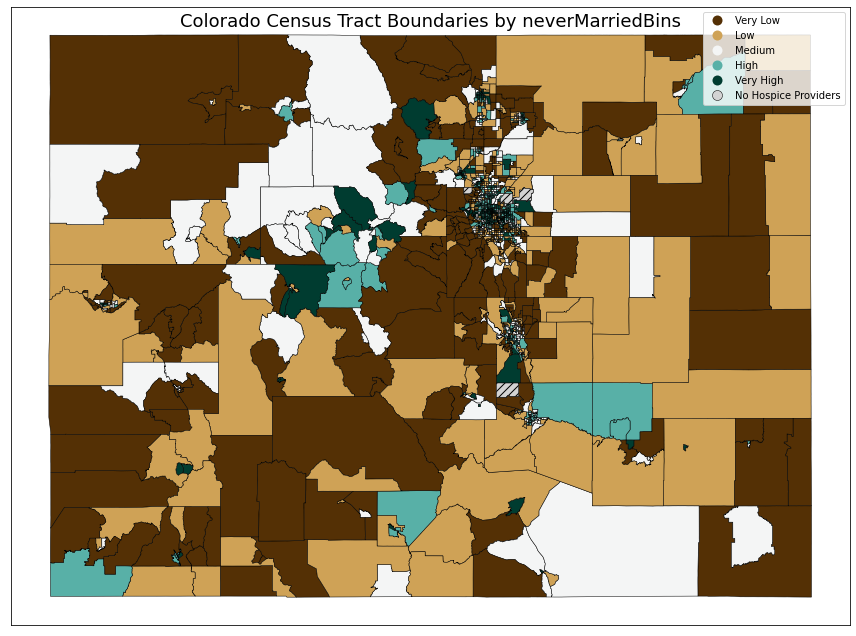

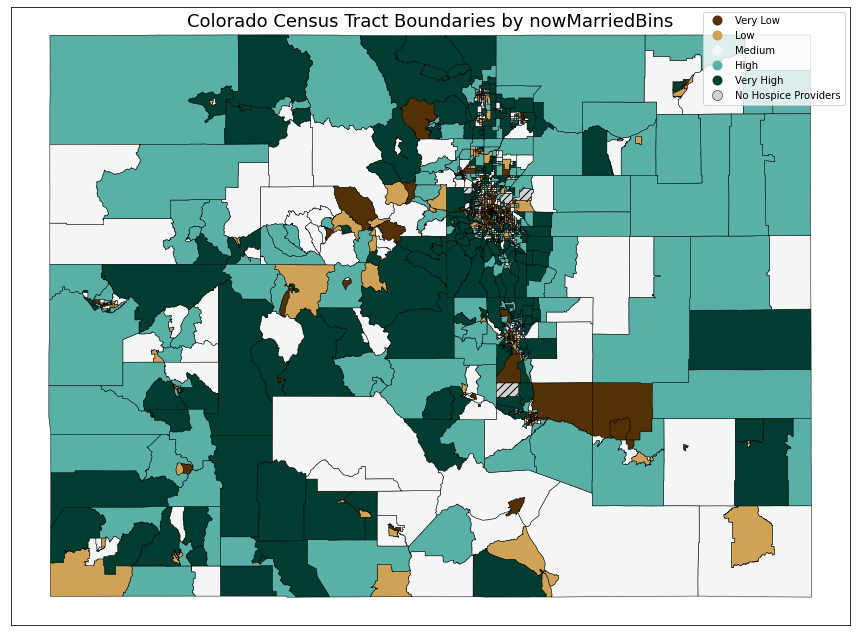

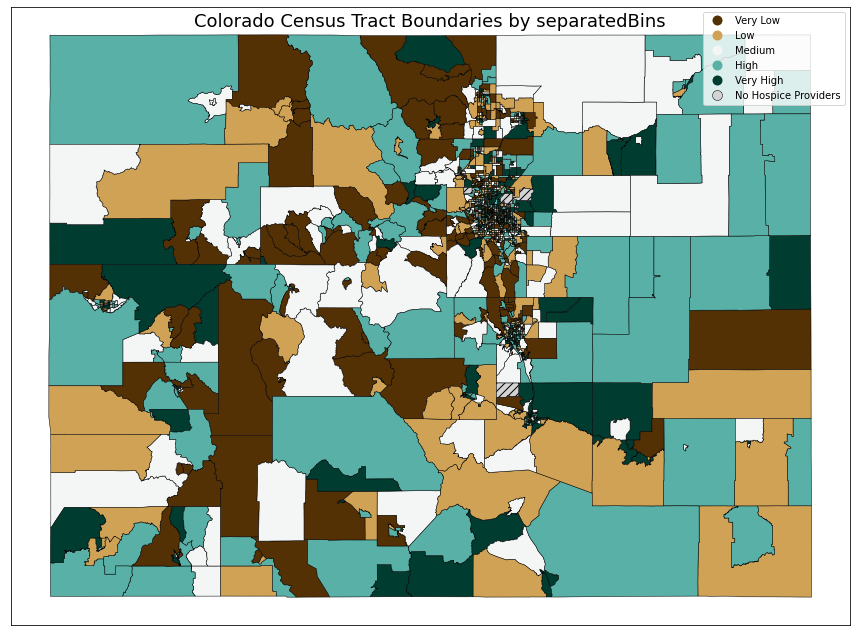

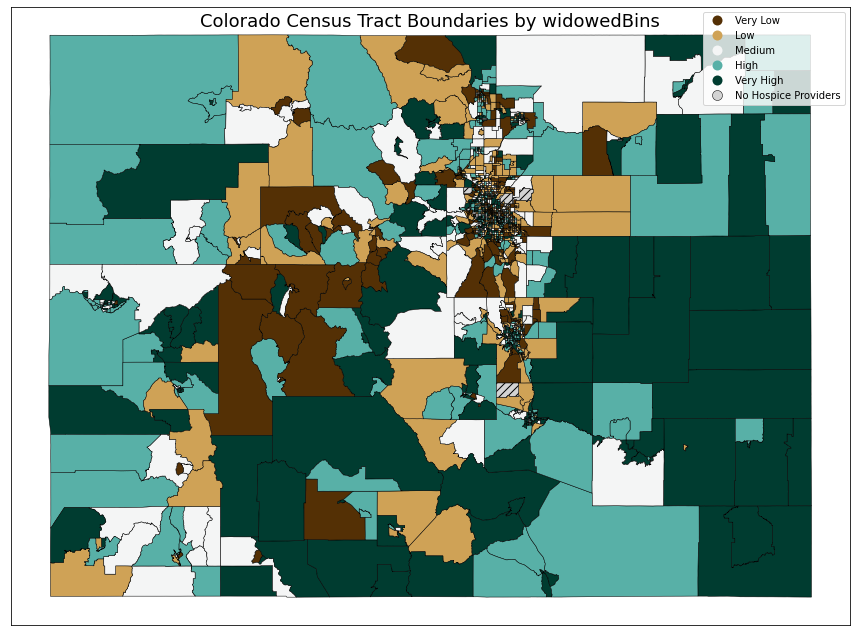

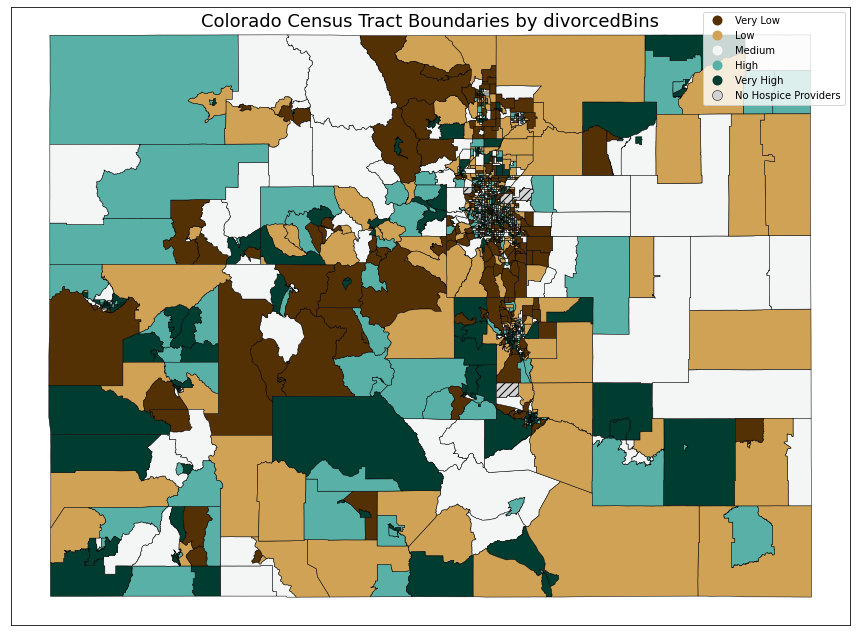

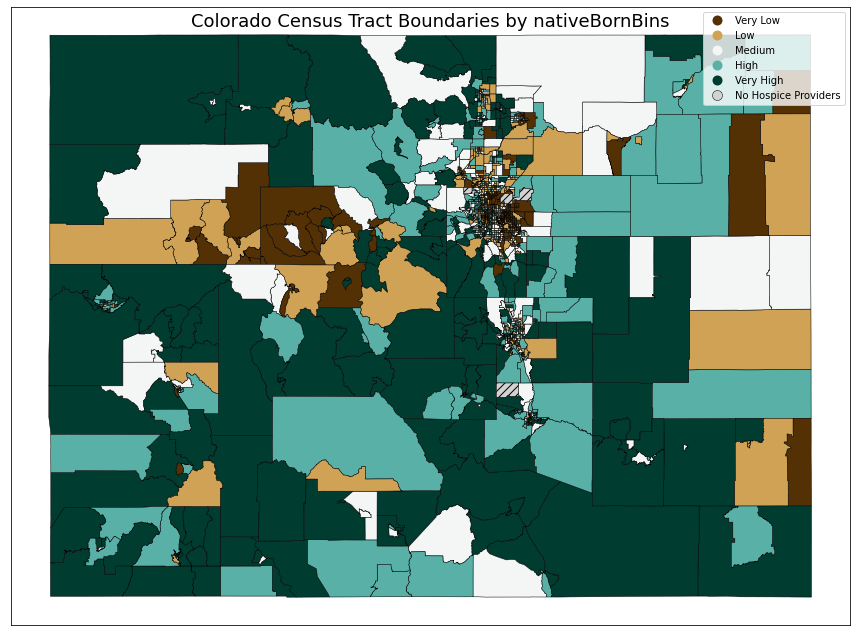

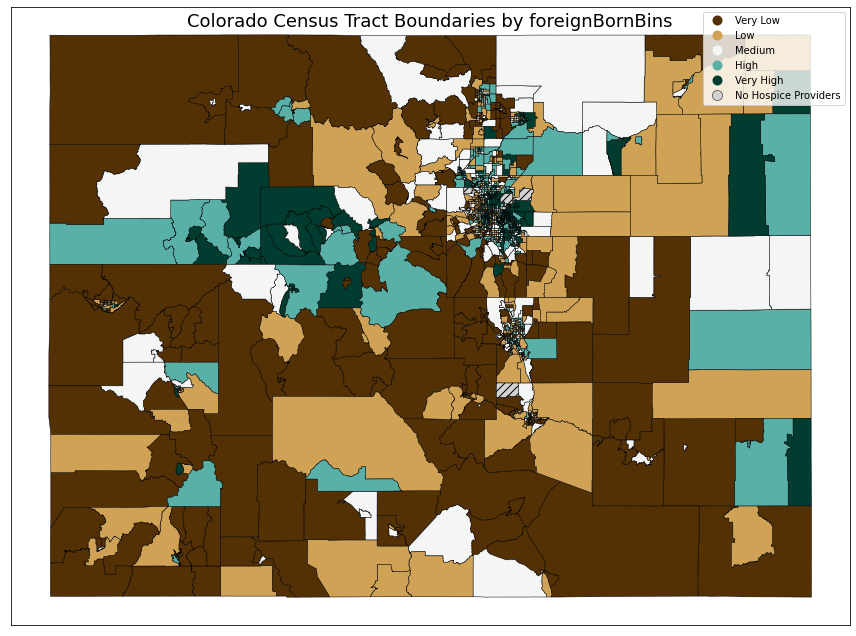

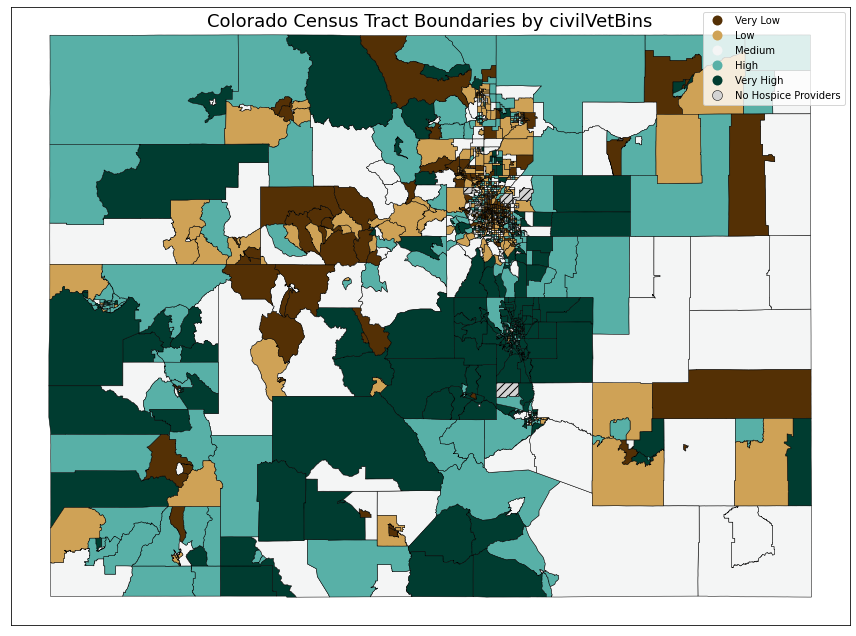

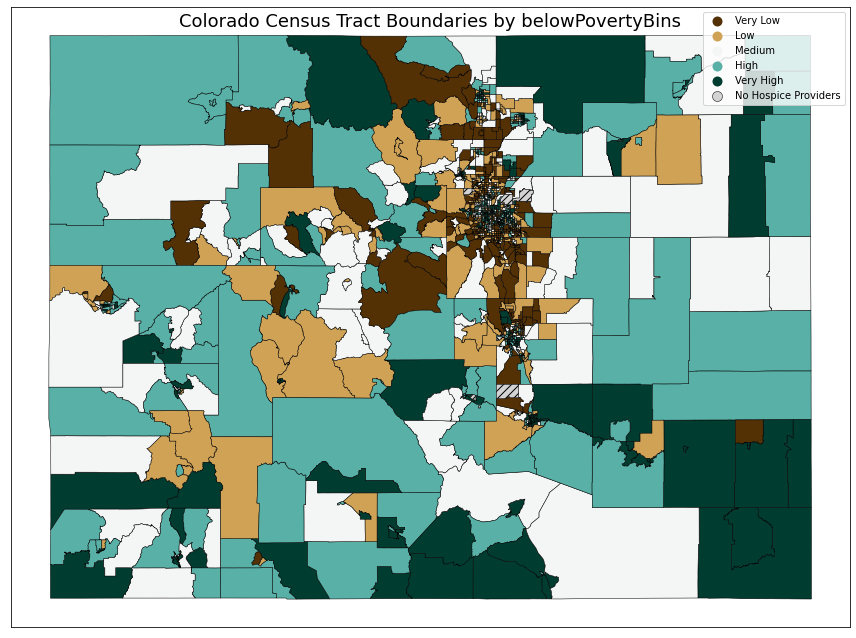

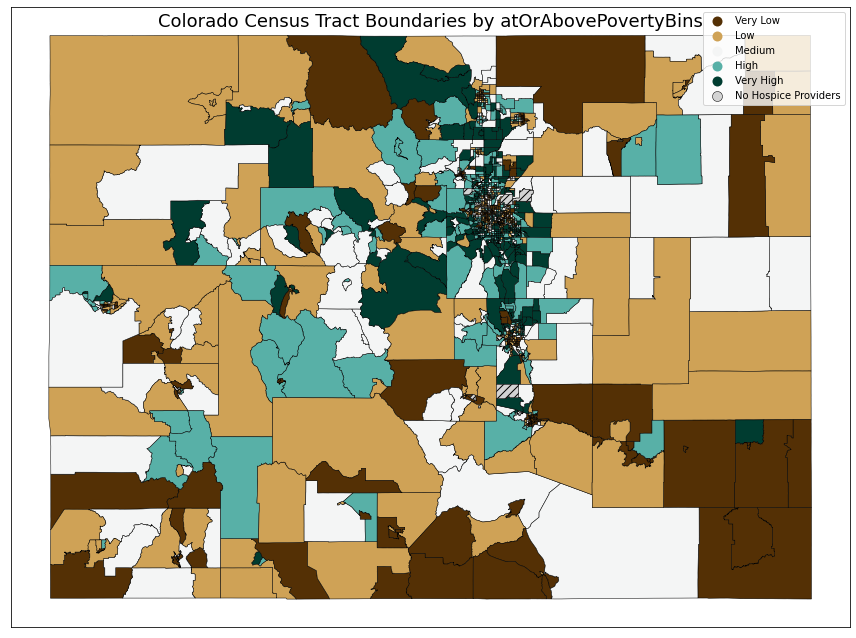

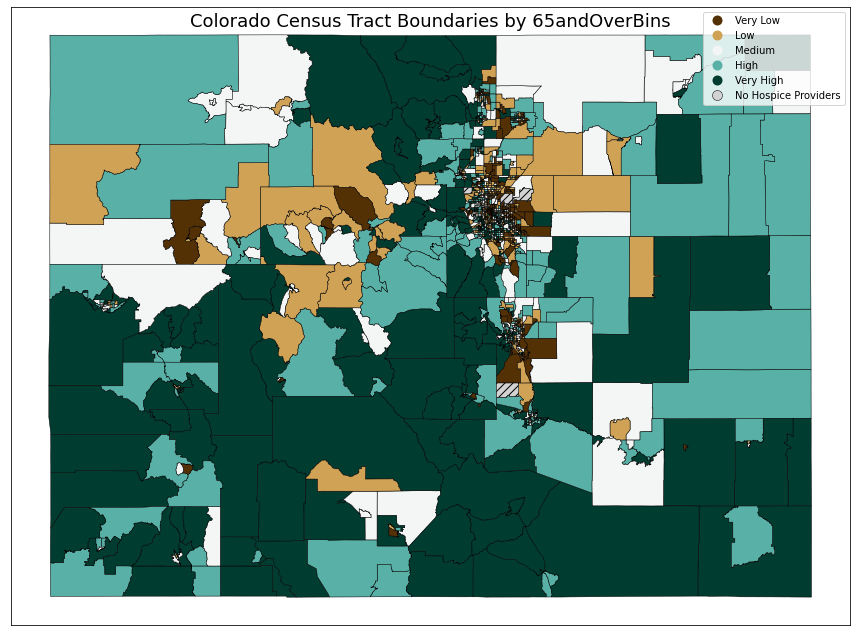

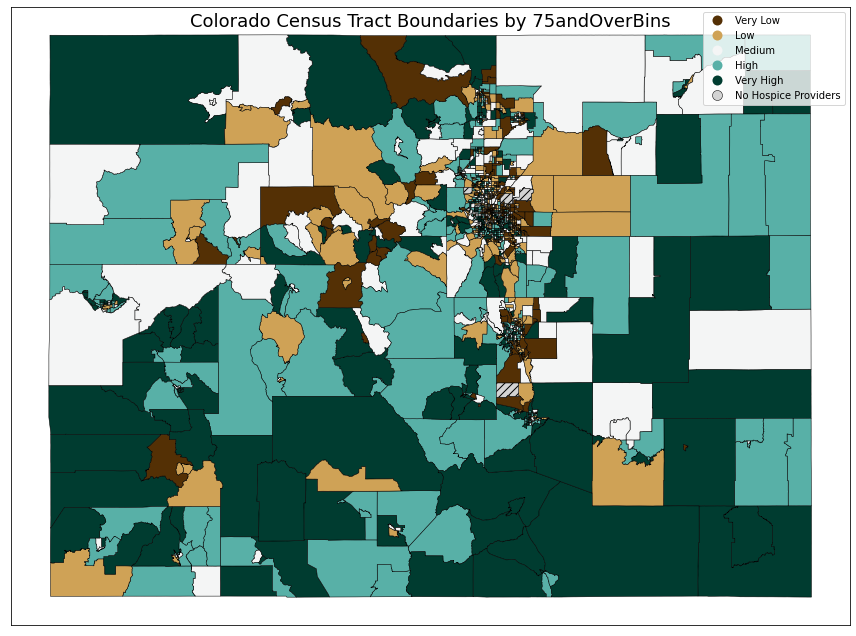

In [22]:
for col in binColumns:
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))
    mergedTableBounds.plot(
        column = col, 
        ax = ax, 
        cmap='BrBG', 
        edgecolor='black', 
        linewidth=0.5,
        legend = True,
        categorical = True,
        missing_kwds = {
            "color": "lightgrey",     
            "edgecolor": "black",     
            "hatch": "///",
            "label": "No Hospice Providers"
        })

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
   
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    ax.text(
        x=(xlim[0] + xlim[1]) / 2,
        y=ylim[1] * 0.999,
        s=f"Colorado Census Tract Boundaries by {col}",
        fontsize=18,
        ha='center',
        va='top',
        backgroundcolor='white',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, boxstyle='square, pad=0.2')
    )


    plt.tight_layout()
    plt.show()

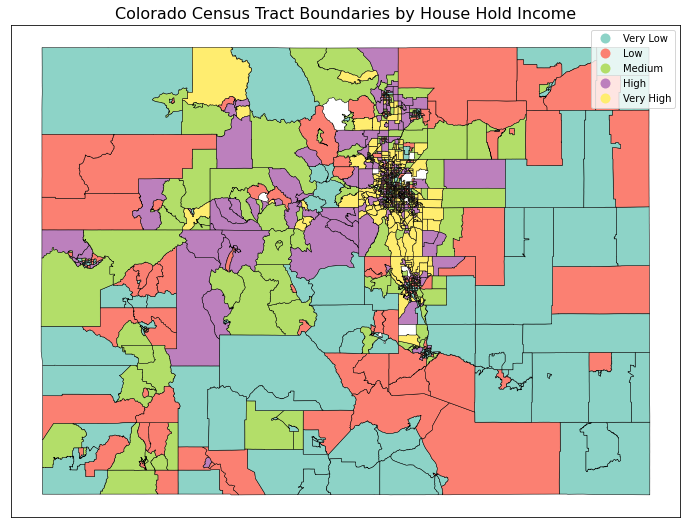

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
mergedTableBounds.plot(
    column = 'householdIncomeBins', 
    ax = ax, 
    cmap='Set3', 
    edgecolor='black', 
    linewidth=0.5,
    legend = True,
    categorical = True)

ax.set_title("Colorado Census Tract Boundaries by House Hold Income", fontsize=16)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.show()
